# **House Price Prediction using Machine Learning**

## **Dataset** 
https://www.kaggle.com/datasets/manishpatil009/real-estate-in-new-york/data

This is a dataset about the properties in New York City.
The data was scraped from Trulia Website with the help of selenium Webdriver. This dataset contains the Name of the property, the city where the property belongs, the Neighborhood, the Price of the Property in USD, the year the property was built in, the beds, baths , Area per Square Feet and the status Air Conditioning.

What to do?

- Data Cleaning
- Changing the Strings to Integers wherever necessary
- Data Visualization
- Prediction of House Prices
(NOTE: The data size is insufficient so it should be used for educational purpose only)

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


df = pd.read_csv('nycHouses.csv',index_col=0)
df.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No


## cleaning the data

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             387 non-null    object
 1   City             387 non-null    object
 2   Neighbourhood    387 non-null    object
 3   Price            387 non-null    object
 4   Year Built       387 non-null    object
 5   Beds             387 non-null    object
 6   Baths            387 non-null    object
 7   Area             387 non-null    object
 8   Price(per sqft)  387 non-null    object
 9   A/C              387 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [566]:
# columns to drop
columns_to_drop = ['Name','City','Price(per sqft)']
df.drop(columns_to_drop,axis=1,inplace=True)
df.head()

,Neighbourhood,Price,Year Built,Beds,Baths,Area,A/C
0,Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,Cooling only
1,Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,Cooling only
2,Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,Cooling only
3,Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,Cooling only
4,Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,No


In [567]:
df['A/C'].value_counts()

No                   146
Heating & Cooling    106
Cooling only          78
Heating only          57
Name: A/C, dtype: int64

In [568]:
df['Area'].value_counts()

Null                            126
800 sqft                         19
1,100 sqft                       19
2,400 sqft                       10
1,899 sqft                       10
1,185 sqft                       10
3,192 sqft                       10
528 sqft                         10
441 sqft                         10
100,964 sqft (on 0.46 acres)     10
880 sqft                         10
513 sqft                         10
842 sqft                         10
1,816 sqft                       10
6,300 sqft                       10
850 sqft                         10
632 sqft                         10
429 sqft                         10
579 sqft                         10
764 sqft                          9
1,275 sqft                        9
1,140 sqft                        9
650 sqft                          9
1,180 sqft                        9
916 sqft                          9
934 sqft                          9
Name: Area, dtype: int64

In [569]:
df['Year Built'] = pd.to_numeric(df['Year Built'].str.extract('(\d+)', expand=False).str.strip(), errors='coerce')
df['Year Built'].fillna(df['Year Built'].median(), inplace=True)
df['Year Built'] = df['Year Built'].astype(int)

In [570]:
import re

def remove_non_numeric_characters(text):
    return re.sub(r'\D', '', text)

df['Area'] = df['Area'].str.replace('(on 0.46 acres)','').apply(remove_non_numeric_characters)
df['Area'] = pd.to_numeric(df['Area'].str.strip(), errors='coerce')

df['Area'].fillna(df['Area'].median(), inplace=True)
df['Area']=df['Area'].astype(int)

In [571]:
# Convert columns to numeric by striping unwanted characters
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(int)

In [572]:
df['Baths'] = df['Baths'].str.replace('Baths', '').str.replace('Bath', '').astype(int)

In [573]:
df['Beds'] = df['Beds'].str.replace('Beds', '').str.replace('Bed', '').str.replace('Studio', '0').astype(int)

In [574]:
#final clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighbourhood  387 non-null    object
 1   Price          387 non-null    int32 
 2   Year Built     387 non-null    int32 
 3   Beds           387 non-null    int32 
 4   Baths          387 non-null    int32 
 5   Area           387 non-null    int32 
 6   A/C            387 non-null    object
dtypes: int32(5), object(2)
memory usage: 16.6+ KB


In [575]:
df = df[df['Area']<6000.0]

## EDA

In [576]:
df.columns

Index(['Neighbourhood', 'Price', 'Year Built', 'Beds', 'Baths', 'Area', 'A/C'], dtype='object')

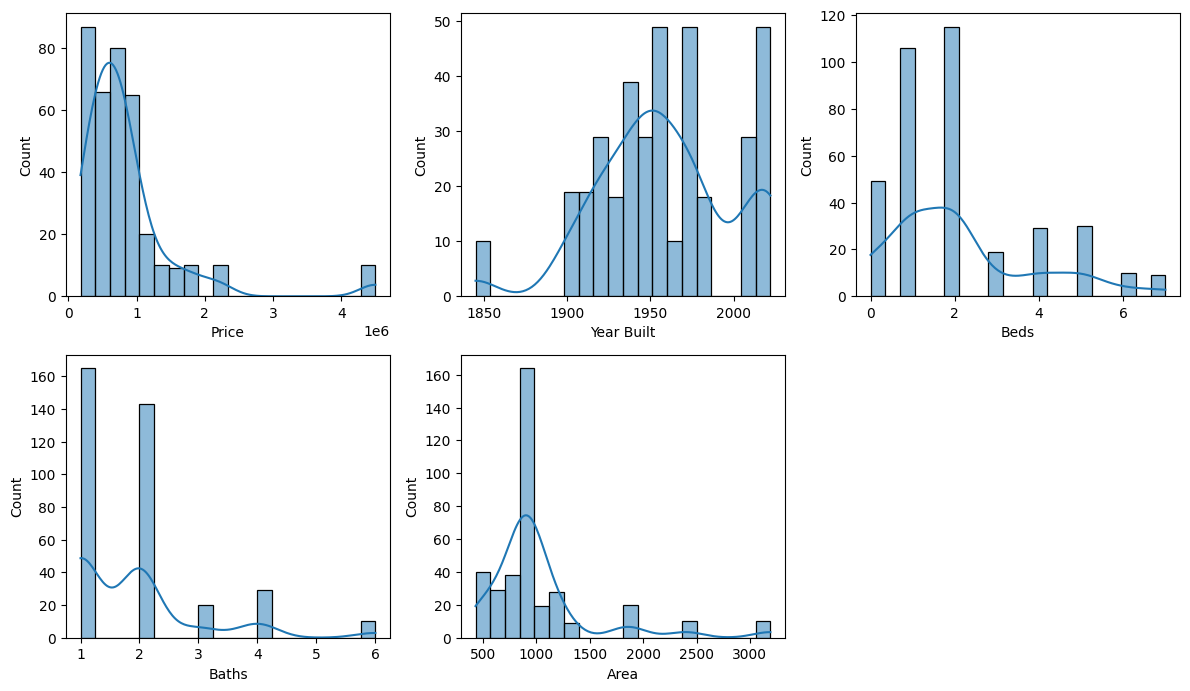

In [577]:
numerical_features = ['Price', 'Year Built', 'Beds', 'Baths', 'Area']

# Explore the distribution of numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
plt.tight_layout()
plt.show()

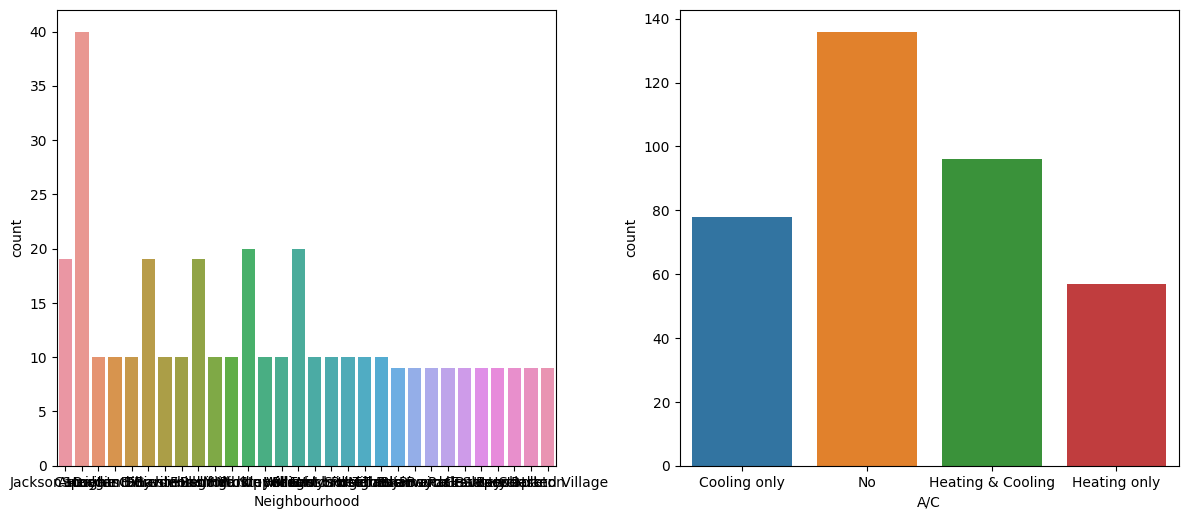

In [578]:
# Explore the distribution of numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(['Neighbourhood','A/C']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df)
plt.tight_layout()
plt.show()

<AxesSubplot: >

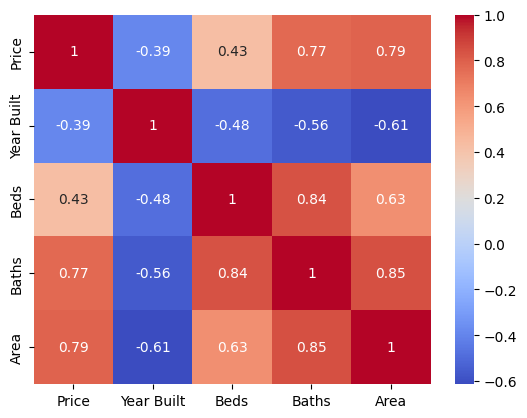

In [579]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## feature engineering

In [580]:

new_df = pd.concat([df, pd.get_dummies(df['Neighbourhood']), pd.get_dummies(df['A/C'])], axis=1)
new_df = new_df.drop(['Neighbourhood', 'A/C'], axis=1)
new_df.head()

,Price,Year Built,Beds,Baths,Area,Astoria,Battery Park,Baychester,Bedford Stuyvesant,Briarwood,...,Spuyten Duyvil,Stapleton,Turtle Bay,Upper East Side,Williamsbridge,Windsor Terrace,Cooling only,Heating & Cooling,Heating only,No
0,285000,1955,1,1,800,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,620000,2022,0,1,441,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,730000,2022,1,1,579,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,570000,2022,0,1,429,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,695000,2022,1,1,632,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [581]:
from sklearn.model_selection import train_test_split
X = new_df.drop(['Price'],axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [582]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Define the hyperparameter spaces for each model
rf_params = {'n_estimators': [100, 200, 300], 
             'max_depth': [None, 5, 10], 
             'min_samples_split': [2, 5, 10]}


lr_params = {'fit_intercept': [True, False]}

# Define the models
rf_model = RandomForestRegressor()
lr_model = LinearRegression()

# Define the grid search objects
grid_rf = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
grid_lr = GridSearchCV(lr_model, param_grid=lr_params, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# Print the best hyperparameters and scores for each model
print("Random Forest:")
print("Best Parameters: ", grid_rf.best_params_)
print("Best Score: ", grid_rf.best_score_)
print()

print("Linear Regression:")
print("Best Parameters: ", grid_lr.best_params_)
print("Best Score: ", grid_lr.best_score_)

Random Forest:
Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  -349411855.36161023

Linear Regression:
Best Parameters:  {'fit_intercept': False}
Best Score:  -62166463209.51803


Best model is a linear regression model with a constant term.

In [583]:
# Make predictions on the testing data
y_pred = grid_lr.predict(X_test)

In [584]:
# metrics
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

37564.55200083874

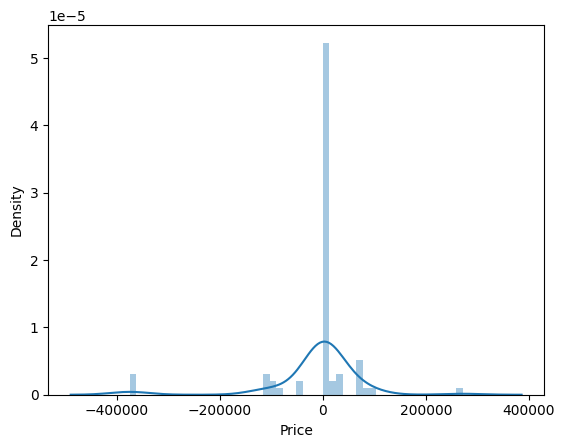

In [585]:
diff = y_test - y_pred
sns.distplot(diff, kde=True);

## Export model

In [586]:
# Import the pickle module, which is a built-in Python library for serializing and de-serializing Python objects
import pickle

pickle.dump(grid_lr, open('priceModel.pkl', 'wb'))
pickle.dump(new_df, open('df.pkl', 'wb'))
